# EXERCISE 1B

You are working as a junior data scientist for a retail company that operates a large shopping mall. The marketing team wants to better understand customer segments so they can create more targeted promotions, loyalty programs, and personalized marketing strategies.

Your task is to analyze customer behavior using the Mall Customers Dataset, which includes information such as age, gender, annual income, and spending score. By applying K-Means clustering, you will identify natural customer groups based on their purchasing patterns.

<img src="https://cdn.theatlantic.com/media/mt/food/main%20Dmitrijs%20Dmitrijevs%20shutterstock_21143044.jpg"/>


In [ ]:
import pandas as pd

from sklearn.cluster import KMeans
from sklearn import datasets,metrics
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score

import numpy as np




In [ ]:
dataseturl = 'https://github.com/robitussin/CCADMACL_EXERCISES/blob/d10902a17b0a0ccfb79fe155ddeb19474d38da71/exercise1b/mallcustomers.csv?raw=true'


## 1. Load the Dataset


Load the Mall Customers dataset (upload or load from a URL).


In [ ]:
df = pd.read_csv(dataseturl)

Display the first 5 rows using `head()`. `(5 pts)`

In [ ]:
df.head()

,CustomerID,Genre,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 2. Explore the Dataset

Print dataset shape. `(5 pts)`


In [ ]:

print(df.shape)

(200, 5)


Show summary statistics using `describe()`. `(5 pts)`

In [ ]:
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Check for missing values. `(5 pts)`

In [ ]:
df.isna().sum()
df.isna()

,CustomerID,Genre,Age,AnnualIncome,SpendingScore,Cluster
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
195,False,False,False,False,False,False
196,False,False,False,False,False,False
197,False,False,False,False,False,False
198,False,False,False,False,False,False


## 3. Select Features for Clustering

Use only the following columns:

- Annual Income (k$)
- Spending Score (1-100)


Create a new DataFrame with only these two columns. `(5 pts)`

In [ ]:
x =df[['AnnualIncome','SpendingScore']]


Display the first 10 rows. `(5 pts)`

In [ ]:
print (x.head(10))

   AnnualIncome  SpendingScore
0            15             39
1            15             81
2            16              6
3            16             77
4            17             40
5            17             76
6            18              6
7            18             94
8            19              3
9            19             72


## 4. Visualize Data `(10 pts)`

- Create a scatter plot of Annual Income vs Spending Score.
- Label axes properly.
- Add a title.

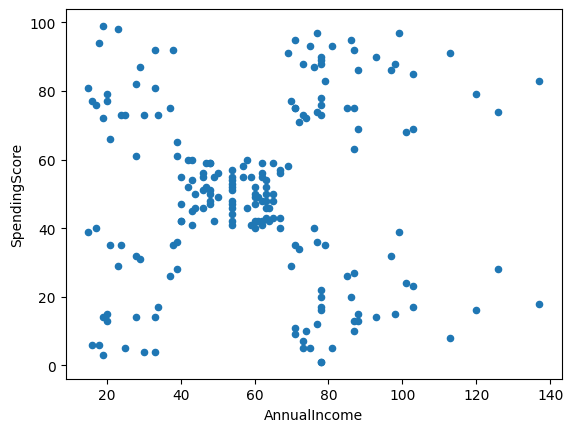

In [ ]:
df.plot.scatter(x='AnnualIncome',y='SpendingScore')
plt.show()

## 5. Determine Optimal Number of Clusters `(10 pts)`

- Run K-Means for K = 1 to 10.
- Store WCSS (within-cluster sum of squares).
- Plot the elbow curve.

For cluster = 1, WCSS is 269981.28000000014
For cluster = 2, WCSS is 181363.59595959607
For cluster = 3, WCSS is 106348.37306211119
For cluster = 4, WCSS is 73679.78903948837
For cluster = 5, WCSS is 44448.45544793369
For cluster = 6, WCSS is 37265.86520484345
For cluster = 7, WCSS is 30259.657207285458
For cluster = 8, WCSS is 25050.832307547524
For cluster = 9, WCSS is 21862.09267218289
For cluster = 10, WCSS is 19657.783608703947


Text(0, 0.5, 'WCSS')

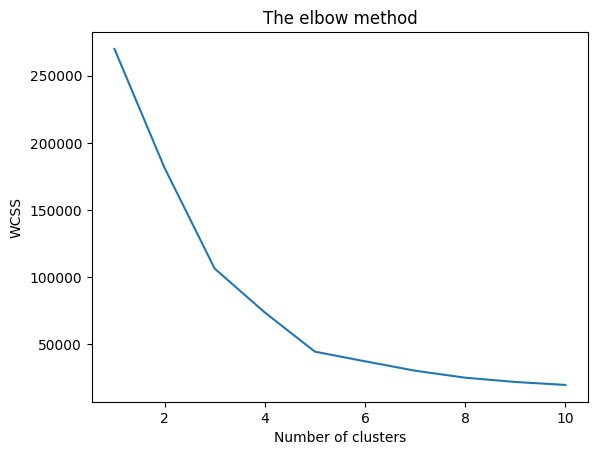

In [ ]:
wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300,
                    n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    print("For cluster = {}, WCSS is {}".format(i, kmeans.inertia_))

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

## 6. Train K-Means with Optimal K `(10 pts)`


- Choose K based on the elbow method.
- Fit the K-Means model.
- Assign cluster labels to the dataset.
- Display first 10 labeled rows.

In [ ]:
cluster_kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300)
model = cluster_kmeans.fit(x)
labels = model.predict(x)
df['Cluster'] = labels
print(df.head(10))

   CustomerID   Genre  Age  AnnualIncome  SpendingScore  Cluster
0           1    Male   19            15             39        2
1           2    Male   21            15             81        3
2           3  Female   20            16              6        2
3           4  Female   23            16             77        3
4           5  Female   31            17             40        2
5           6  Female   22            17             76        3
6           7  Female   35            18              6        2
7           8  Female   23            18             94        3
8           9    Male   64            19              3        2
9          10  Female   30            19             72        3


## 7. Visualize the Clusters `(10 pts)`

- Create a scatter plot showing the formed clusters.
- Color points by cluster.
- Plot cluster centroids as larger points.

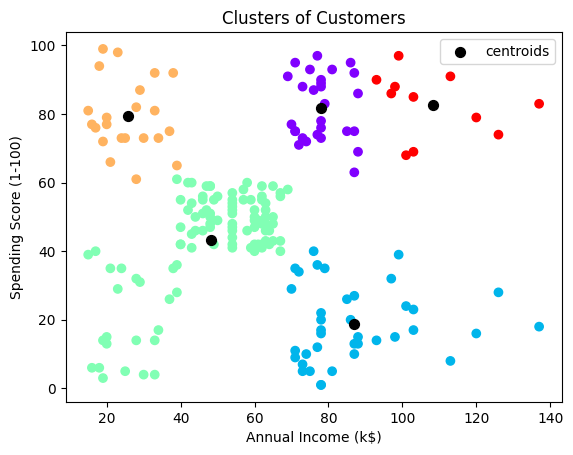

In [ ]:
centroids = model.cluster_centers_
plt.scatter(x['AnnualIncome'], x['SpendingScore'], c=labels, cmap = 'rainbow')
plt.scatter(centroids[:, 0], centroids[:, 1], s=50, c='black', marker = 'o', label = 'centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters of Customers')
plt.legend()
plt.show()

## 8. Cluster Interpretation



Answer the following (in text, not code): `(10 pts)`

- Which cluster represents high income, low spending users?
- Which cluster represents low income, high spending users?
- Which cluster might represent target customers for promotions?
- What business insights can you derive from the clusters?

Cluster 3 captures the high-income segment, bringing in around 88k with a spending score of 17.

Cluster 2 represents the low-income but high-spending group, with about 26k income and a spending score of 79.

Clusters 1 and 2 can be considered strong targets for promotions: Cluster 1 has an annual income of roughly 87k, while Cluster 2 consists of low-income but heavy spenders.

Cluster 0 corresponds to average customers, Cluster 1 to loyal customers, Cluster 2 to budget-conscious heavy spenders, Cluster 3 to potential high spenders, and Cluster 4 to new customers.

## 9. Add Age to the Clustering Model

Create a new 3D K-Means model using features: `(5 pts)`


- Age
- Annual Income
- Spending Score


In [ ]:
import plotly.express as px

X = df[['Age', 'AnnualIncome', 'SpendingScore']]

cluster_Kmeans = KMeans(n_clusters=5, random_state=0)

model_kmeans = cluster_Kmeans.fit(X)

pred_kmeans = model_kmeans.labels_

print(pred_kmeans)


fig = px.scatter_3d(df, x='Age', y='AnnualIncome', z='SpendingScore', color=pred_kmeans.astype(str))
fig.update_layout(scene = dict(
                    xaxis_title='Age',
                    yaxis_title='Annual Income (k$)',
                    zaxis_title='Spending Score (1-100)'))
fig.show()

[2 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 4 4 4 0 4 4 0 0 0 0 0 4 0 0 4 0 0 0 4 4 0 4 4 0 0 0 0
 0 4 4 4 4 0 0 4 0 4 4 4 4 4 4 4 0 4 4 4 4 4 4 4 4 4 4 4 0 4 4 4 0 4 0 0 0
 4 4 4 4 4 0 4 4 4 4 4 4 1 4 1 4 1 3 1 3 1 4 1 3 1 3 1 3 1 3 1 4 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


Visualize using a 3D scatter plot. `(5 pts)`

## 10. 3D Cluster Interpretation



Answer the following (in text, not code): `(10 pts)`

- Are there meaningful and distinguishable clusters?
- What business insights can you derive from the clusters in 3D??

Cluster 0 forms a compact, tightly packed group, indicating that the customers within this segment share very similar patterns in both income and spending behavior. The density of the cluster shows that these users are consistent and don’t deviate much from one another.

This characterization matches the earlier interpretation in number 8, where Cluster 0 was identified as the “average customer” segment. Their uniform placement in the plot reinforces that they exhibit stable, moderate spending and income levels, without extreme highs or lows.